## Define functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Visualization class
class Plotter:
    def __init__(self):
        pass

    def bar_chart(self, labels, values, color="skyblue", title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        """Draws a bar chart"""
        plt.figure(figsize=(6, 4))
        plt.bar(labels, values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def line_chart(self, x, y, color="green", marker="o", title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        """Draws a line chart"""
        plt.figure(figsize=(6, 4))
        plt.plot(x, y, color=color, marker=marker)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def frequency_chart(self, data, color="skyblue", title="Frequency Chart",
                        xlabel="Categories", ylabel="Frequency", top_n=None):
        """Draws a frequency bar chart"""

        # Convert to pandas Series if not already
        if not isinstance(data, pd.Series):
            data = pd.Series(data)

        # Calculate frequencies
        freq = data.value_counts(dropna=False)

        # Limit to top N if specified
        if top_n:
            freq = freq.head(top_n)

        # Plot chart
        plt.figure(figsize=(6, 4))
        plt.bar(freq.index.astype(str), freq.values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    def scatter_plot(self, x, y, data=None, color="dodgerblue", size=50,
                     alpha=0.7, title="Scatter Plot", xlabel=None, ylabel=None,
                     trendline=False):
        """Draws a scatter plot with optional trendline"""

        # Handle input
        x_vals = data[x] if isinstance(x, str) and data is not None else pd.Series(x)
        y_vals = data[y] if isinstance(y, str) and data is not None else pd.Series(y)

        # Create scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x_vals, y_vals, c=color, s=size, alpha=alpha)
        plt.title(title)
        plt.xlabel(xlabel if xlabel else x)
        plt.ylabel(ylabel if ylabel else y)
        plt.grid(True, linestyle="--", alpha=0.6)

        # Add trendline if requested
        if trendline:
            m, b = np.polyfit(x_vals, y_vals, 1)
            plt.plot(x_vals, m * x_vals + b, color="red", linewidth=2, label="Trendline")
            plt.legend()

        plt.tight_layout()
        plt.show()

# Linear regression model function
def linear_regression_model(X, y, X_test=None):
    """Trains a linear regression model and prints the equation"""

    # Convert X to proper format
    if isinstance(X, pd.Series):
        X = X.to_frame()
    elif isinstance(X, list) or isinstance(X, np.ndarray):
        X = np.array(X).reshape(-1, 1) if np.ndim(X) == 1 else np.array(X)

    # Convert y to proper format
    y = y.squeeze() if isinstance(y, pd.DataFrame) else np.array(y)

    # Train model
    model = LinearRegression()
    model.fit(X, y)

    # Predict if test data is provided
    y_test_pred = None
    if X_test is not None:
        if isinstance(X_test, pd.Series):
            X_test = X_test.to_frame()
        elif isinstance(X_test, list) or isinstance(X_test, np.ndarray):
            X_test = np.array(X_test).reshape(-1, 1)
        y_test_pred = model.predict(X_test)

    print(f"\nEquation: y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x")

    return y_test_pred

# Min-Max scaling function
def min_max_scaling(X, feature_range=(0, 1)):
    """Applies Min-Max scaling to the input data"""
    scaler = MinMaxScaler(feature_range=feature_range)
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Train-test split function
def train_test_split_data(X, y, test_size=0.2, random_state=None):
    """Splits data into training and testing sets"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

## Retreive Data

In [2]:
plotter = Plotter()

retail_2009_2011 = pd.read_excel(r"..\..\solution\Tables\bill.xlsx")

In [3]:
# Load and prepare data for analysis
lr_data = retail_2009_2011  # <- Can apply filters to this dataset
lr_data = lr_data.loc[:, :].reset_index(drop=True)  # Reset index and preserve all columns

# Add new time-based fields
lr_data["month"] = lr_data["invoicedate"].dt.month - 1  # Month index starting from 0
lr_data["day"] = lr_data["invoicedate"].dt.day - 1      # Day index starting from 0

# Preview the updated dataframe
print(lr_data.head())
print(lr_data.dtypes)

   invoice_id  invoice  stockcode                          description  \
0           0   489434      85048  15cm christmas glass ball 20 lights   
1           1   489434      79323                   Pink cherry lights   
2           2   489434      79323                  white cherry lights   
3           3   489434      21232       Strawberry ceramic trinket box   
4           4   489434      22064           Pink doughnut trinket pot    

   quantity invoicedate  price  customer_id  country  total  department  \
0        12  2009-12-01   6.95        13085        0   83.4          20   
1        12  2009-12-01   6.75        13085        0   81.0          20   
2        12  2009-12-01   6.75        13085        0   81.0          20   
3        24  2009-12-01   1.25        13085        0   30.0          20   
4        24  2009-12-01   1.65        13085        0   39.6          20   

   month  day  
0     11    0  
1     11    0  
2     11    0  
3     11    0  
4     11    0  
invoice_

In [4]:
print("## INFO: \n", lr_data.info())
print("DETAILS: \n", lr_data.describe())
print(f"""
## Details:
- Number of records: {lr_data.shape[0]}
- Number of features: {lr_data.shape[1]}
- Missing values:\n{lr_data.isnull().sum()}   
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689287 entries, 0 to 689286
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice_id   689287 non-null  int64         
 1   invoice      689287 non-null  int64         
 2   stockcode    689287 non-null  int64         
 3   description  689287 non-null  object        
 4   quantity     689287 non-null  int64         
 5   invoicedate  689287 non-null  datetime64[ns]
 6   price        689287 non-null  float64       
 7   customer_id  689287 non-null  int64         
 8   country      689287 non-null  int64         
 9   total        689287 non-null  float64       
 10  department   689287 non-null  int64         
 11  month        689287 non-null  int32         
 12  day          689287 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(7), object(1)
memory usage: 63.1+ MB
## INFO: 
 None
DETAILS: 
           invoice_id

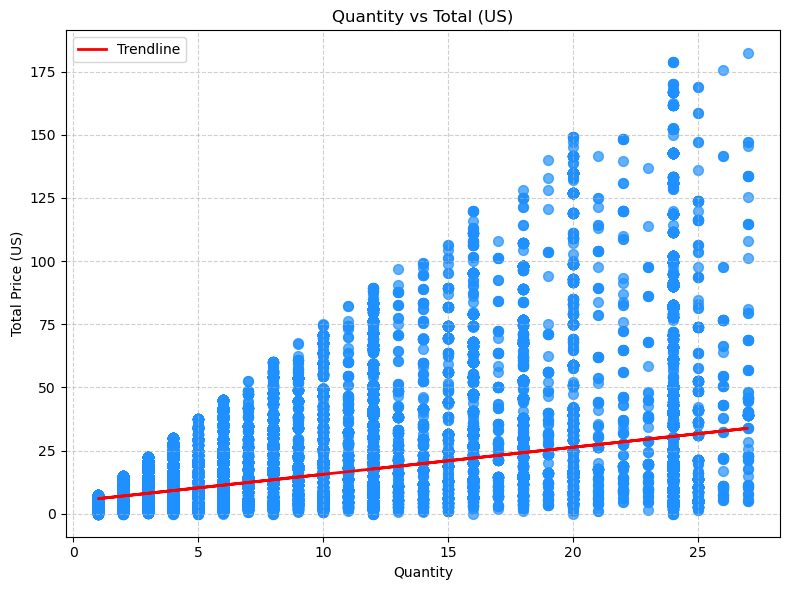

In [5]:
# Filter the dataframe by country (United Kingdom)
lr_data_2 = lr_data.loc[lr_data["country"] == 0, :]  # 0 represents United Kingdom

# Plot quantity vs total price with a trendline
plotter.scatter_plot(
    x="quantity",
    y="total",
    data=lr_data_2,
    title="Quantity vs Total (US)",
    xlabel="Quantity",
    ylabel="Total Price (US)",
    trendline=True
)

In [6]:
# I define 20% 137.857 records of data as test data
X_train, X_test, y_train, y_test = train_test_split_data(lr_data["quantity"], lr_data["total"])

In [7]:
prediction = linear_regression_model(X_train, y_train, X_test)
print(prediction)


Equation: y = 5.22 + 1.05x
[26.31753281  6.27872951 13.66144652 ...  9.44275109  7.33340337
 17.88014195]


### Train data

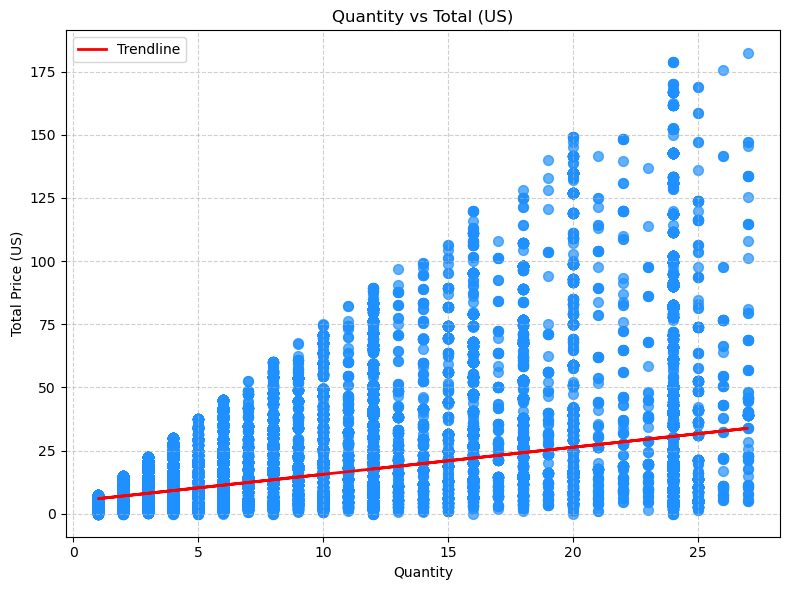

In [8]:
# Filter the dataframe by country (United Kingdom)
lr_data_2 = lr_data.loc[lr_data["country"] == 0, :]  # 0 represents United Kingdom

# Plot quantity vs total price with a trendline
plotter.scatter_plot(
    x="quantity",
    y="total",
    data=lr_data_2,
    title="Quantity vs Total (US)",
    xlabel="Quantity",
    ylabel="Total Price (US)",
    trendline=True
)


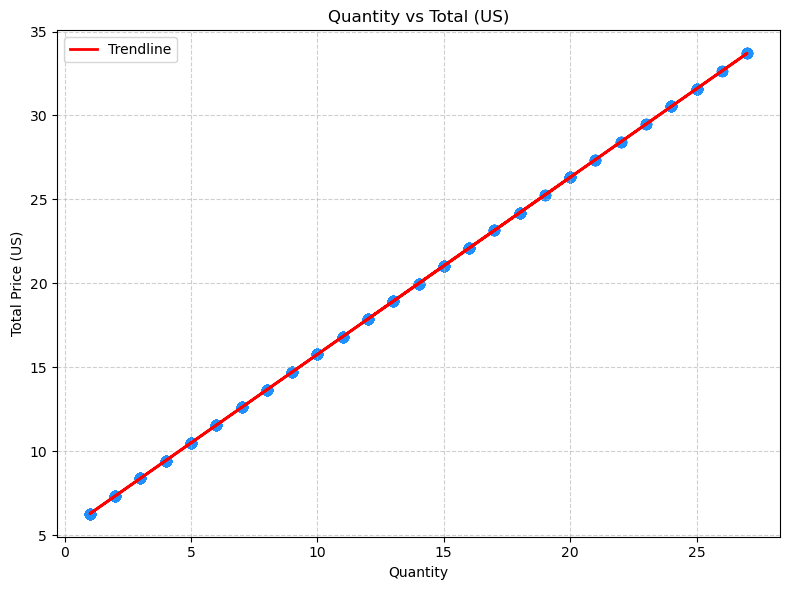

In [9]:
# Plot predicted values against test input using scatter plot
plotter.scatter_plot(
    x=X_test,
    y=prediction,
    data=lr_data_2,
    title="Quantity vs Total (US)",
    xlabel="Quantity",
    ylabel="Total Price (US)",
    trendline=True
)

### Prediction

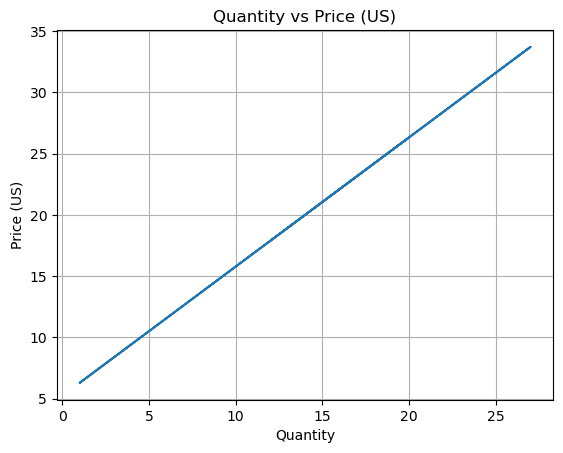

In [10]:
plt.plot(X_test, prediction)
plt.grid(True)
plt.xlabel("Quantity")
plt.ylabel("Price (US)")
plt.title("Quantity vs Price (US)")
plt.show()
